In [40]:
from io import StringIO
import os
import boto3

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm  # colormap module

pd.set_option("display.max_columns", 50)
sns.set(style='whitegrid')

In [41]:
aws_access_key_id = os.getenv("AWS_ACCESS_KEY")
aws_secret_key = os.getenv("AWS_SECRET_KEY")

In [42]:
def read_csv_from_s3(bucket: str, path: str, filename: str) -> pd.DataFrame:
    """Downloads a csv file from an S3 bucket.

    Parameters
    ----------
    bucket : str
        The bucket where the files at.
    path : str
        The folders to the file.
    filename : str
        Name of the file.

    Returns
    -------
    pd.DataFrame
        A DataFrame of the downloaded file.
    """

    s3 = boto3.client("s3", aws_access_key_id=aws_access_key_id, aws_secret_access_key=aws_secret_key)
    full_path = f"{path}{filename}"

    object = s3.get_object(Bucket=bucket, Key=full_path)
    object = object["Body"].read().decode("utf-8")
    output_df = pd.read_csv(StringIO(object))

    return output_df

In [43]:
s3 = boto3.client(
        "s3",
        aws_access_key_id=aws_access_key_id,
        aws_secret_access_key=aws_secret_key
    )
bucket = "cubix-chicago-taxi-bb-rita"

community_areas_path = "transformed_data/community_areas/"
company_path = "transformed_data/company/"
date_path = "transformed_data/date/"
payment_type_path = "transformed_data/payment_type/"
taxi_trips_path = "transformed_data/taxi_trips/"
weather_path = "transformed_data/weather/"

In [44]:
community_areas = read_csv_from_s3(bucket, community_areas_path, "community_areas_master.csv")
company = read_csv_from_s3(bucket, company_path, "company_master.csv")
date = read_csv_from_s3(bucket, date_path, "date_dimension.csv")
payment_type = read_csv_from_s3(bucket=bucket, path=payment_type_path, filename="payment_type_master.csv")

In [45]:
trips_list = []
weather_list = []

In [46]:
for file in s3.list_objects(Bucket=bucket, Prefix=taxi_trips_path)['Contents']:
    taxi_trip_key = file['Key']

    if taxi_trip_key.split("/")[-1].strip() != "":
        if taxi_trip_key.split(".")[-1] == "csv":
            filename = taxi_trip_key.split("/")[-1]
            trip = read_csv_from_s3(bucket, taxi_trips_path, filename)

            trips_list.append(trip)
            print(f"{filename} has been added.")

taxi_2024-10-03.csv has been added.
taxi_2024-10-04.csv has been added.
taxi_2024-10-05.csv has been added.
taxi_2024-10-06.csv has been added.
taxi_2024-10-07.csv has been added.
taxi_2024-10-08.csv has been added.
taxi_2024-10-09.csv has been added.
taxi_2024-10-10.csv has been added.
taxi_2024-10-11.csv has been added.
taxi_2024-10-12.csv has been added.
taxi_2024-10-13.csv has been added.
taxi_2024-10-14.csv has been added.
taxi_2024-10-15.csv has been added.
taxi_2024-10-16.csv has been added.
taxi_2024-10-17.csv has been added.
taxi_2024-10-18.csv has been added.
taxi_2024-10-19.csv has been added.
taxi_2024-10-20.csv has been added.
taxi_2024-10-21.csv has been added.
taxi_2024-10-22.csv has been added.
taxi_2024-10-23.csv has been added.
taxi_2024-10-24.csv has been added.
taxi_2024-10-25.csv has been added.
taxi_2024-10-26.csv has been added.
taxi_2024-10-27.csv has been added.
taxi_2024-10-28.csv has been added.
taxi_2024-10-29.csv has been added.
taxi_2024-10-30.csv has been

In [47]:
trips = pd.concat(trips_list, ignore_index = True)

In [48]:
trips.head()
trips.info()
trips.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626094 entries, 0 to 626093
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   trip_id                     626094 non-null  object 
 1   taxi_id                     626094 non-null  object 
 2   trip_start_timestamp        626094 non-null  object 
 3   trip_end_timestamp          626094 non-null  object 
 4   trip_seconds                626094 non-null  int64  
 5   trip_miles                  626094 non-null  float64
 6   pickup_community_area_id    626094 non-null  int64  
 7   dropoff_community_area_id   626094 non-null  int64  
 8   fare                        626094 non-null  float64
 9   tips                        626094 non-null  float64
 10  tolls                       626094 non-null  float64
 11  extras                      626094 non-null  float64
 12  trip_total                  626094 non-null  float64
 13  pickup_centroi

(626094, 20)

In [49]:
for file in s3.list_objects(Bucket=bucket, Prefix=weather_path)["Contents"]:
    weather_key = file["Key"]

    if weather_key.split("/")[-1].strip() != "":
        if weather_key.split(".")[-1] == "csv":

            filename = weather_key.split("/")[-1]
            weather_daily = read_csv_from_s3(bucket, weather_path, filename)

            weather_list.append(weather_daily)
            print(f"{filename} has been added.")

weather_2024-10-03.csv has been added.
weather_2024-10-04.csv has been added.
weather_2024-10-05.csv has been added.
weather_2024-10-06.csv has been added.
weather_2024-10-07.csv has been added.
weather_2024-10-08.csv has been added.
weather_2024-10-09.csv has been added.
weather_2024-10-10.csv has been added.
weather_2024-10-11.csv has been added.
weather_2024-10-12.csv has been added.
weather_2024-10-13.csv has been added.
weather_2024-10-14.csv has been added.
weather_2024-10-15.csv has been added.
weather_2024-10-16.csv has been added.
weather_2024-10-17.csv has been added.
weather_2024-10-18.csv has been added.
weather_2024-10-19.csv has been added.
weather_2024-10-20.csv has been added.
weather_2024-10-21.csv has been added.
weather_2024-10-22.csv has been added.
weather_2024-10-23.csv has been added.
weather_2024-10-24.csv has been added.
weather_2024-10-25.csv has been added.
weather_2024-10-26.csv has been added.
weather_2024-10-27.csv has been added.
weather_2024-10-28.csv ha

In [83]:
weather = pd.concat(weather_list, ignore_index = True)

In [84]:
weather.head()
weather.info()
weather.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       864 non-null    object 
 1   temperature    864 non-null    float64
 2   wind_speed     864 non-null    float64
 3   rain           864 non-null    float64
 4   precipitation  864 non-null    float64
dtypes: float64(4), object(1)
memory usage: 33.9+ KB


(864, 5)

In [85]:
trips_full = pd.merge(trips, weather, left_on="datetime_for_weather", right_on="datetime", how="inner")
trips_full = trips_full.drop(columns=["datetime"])


In [86]:
trips_full = pd.merge(trips_full, company, left_on="company_id", right_on="company_id", how="inner")
trips_full = trips_full.drop(columns=["company_id"])


In [87]:

trips_full = pd.merge(trips_full, payment_type, left_on="payment_type_id", right_on="payment_type_id", how="inner")
trips_full = trips_full.drop(columns=["payment_type_id"])


In [88]:

trips_full = pd.merge(trips_full, community_areas, left_on="pickup_community_area_id", right_on="area_code", how="inner")
trips_full = trips_full.drop(columns=["pickup_community_area_id", "area_code"])
trips_full.rename(columns={"community_name": "pickup_community_area_name"}, inplace=True)


In [89]:

trips_full = pd.merge(trips_full, community_areas, left_on="dropoff_community_area_id", right_on="area_code", how="inner")
trips_full = trips_full.drop(columns=["dropoff_community_area_id", "area_code"])
trips_full.rename(columns={"community_name": "dropoff_community_area_name"}, inplace=True)

In [90]:
date['date'] = pd.to_datetime(date['date'])
trips_full['trip_start_timestamp'] = pd.to_datetime(trips_full['trip_start_timestamp'])
trips_full['trip_start_date'] = trips_full['trip_start_timestamp'].dt.date
trips_full['trip_start_date'] = pd.to_datetime(trips_full['trip_start_date'])


In [91]:

trips_full = pd.merge(trips_full, date, left_on="trip_start_date", right_on="date", how="inner")
trips_full = trips_full.drop(columns=["date"])

In [92]:
trips_full.head()
# trips_full.info()
# trips_full.shape

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,temperature,wind_speed,rain,precipitation,company,payment_type,pickup_community_area_name,dropoff_community_area_name,trip_start_date,year,month,day,day_of_week,is_weekend
0,9caf1197a8eaffa9468b9ff1eb7669a958bafad9,1a248eb87ae578f15af2a14c2eb7b4b264f6babab9ad9c...,2024-10-03 23:45:00,2024-10-04T00:00:00.000,626,3.52,12.00,3.12,0.0,0.0,15.62,41.899602,-87.633308,41.922686,-87.649489,2024-10-03 23:00:00,9.9,14.8,0.0,0.0,Sun Taxi,Credit Card,Near North Side,Lincoln Park,2024-10-03,2024,10,3,4,False
1,fb421a6d1a45dc15311ba10f30f448e583718bdb,48d462bcf24c2aadcda3fcf689d3f63fc178f23dc73bba...,2024-10-03 23:45:00,2024-10-04T00:00:00.000,835,4.48,12.73,3.32,0.0,0.0,16.05,41.899602,-87.633308,41.857184,-87.620335,2024-10-03 23:00:00,9.9,14.8,0.0,0.0,Sun Taxi,Mobile,Near North Side,Near South Side,2024-10-03,2024,10,3,4,False
2,f67243ee732e06bb4e2d6b0dd7cc98d39951c016,e1cf6c401b0eff9128dad27435a344db33ed69d2be0a63...,2024-10-03 23:45:00,2024-10-04T00:00:00.000,1088,5.86,15.37,3.77,0.0,0.0,19.14,41.944227,-87.655998,41.874005,-87.663518,2024-10-03 23:00:00,9.9,14.8,0.0,0.0,5 Star Taxi,Mobile,Lake View,Near West Side,2024-10-03,2024,10,3,4,False
3,f292fd839b7f5e901124c899421586b59551fe31,b77a2dcc078698ea493d4d703014076e4272dc7d8b420e...,2024-10-03 23:45:00,2024-10-04T00:15:00.000,1860,22.70,54.25,11.95,0.0,5.0,71.20,41.980264,-87.913625,41.809018,-87.659167,2024-10-03 23:00:00,9.9,14.8,0.0,0.0,Taxi Affiliation Services,Credit Card,O'Hare,New City,2024-10-03,2024,10,3,4,False
4,ecc4413872b0dfc42f14359dd721bff99734570a,30b72bb886e483d8dfd1adc7eff86789a677e3732ccd5c...,2024-10-03 23:45:00,2024-10-04T00:15:00.000,1469,17.92,44.50,10.00,0.0,5.0,60.00,41.980264,-87.913625,41.899602,-87.633308,2024-10-03 23:00:00,9.9,14.8,0.0,0.0,City Service,Credit Card,O'Hare,Near North Side,2024-10-03,2024,10,3,4,False


In [93]:
community_areas.head()

,area_code,community_name
0,1,Rogers Park
1,2,West Ridge
2,3,Uptown
3,4,Lincoln Square
4,5,North Center


In [94]:
company.tail()

,company_id,company
30,31,3556 - 36214 RC Andrews Cab
31,32,6574 - Babylon Express Inc.
32,33,Tac - Yellow Non Color
33,34,Metro Jet Taxi A.
34,35,3591 - 63480 Chuks Cab


In [95]:
date.head()

,date,year,month,day,day_of_week,is_weekend
0,2023-01-01,2023,1,1,7,True
1,2023-01-02,2023,1,2,1,False
2,2023-01-03,2023,1,3,2,False
3,2023-01-04,2023,1,4,3,False
4,2023-01-05,2023,1,5,4,False


In [96]:
payment_type.head()

,payment_type_id,payment_type
0,1,Credit Card
1,2,Cash
2,3,Unknown
3,4,Prcard
4,5,Mobile


In [97]:
# Extract Hour of the Day
trips_full['Hour of the day'] = pd.to_datetime(trips_full['trip_start_timestamp']).dt.hour

# Calculate Hourly Ride Count
hourly_ride_count = trips_full.groupby('Hour of the day').size().reset_index(name='hourly ride count')
trips_full = trips_full.merge(hourly_ride_count, on='Hour of the day', how='left') 

# Calculate Hourly Avg Fare
hourly_fare_avg = trips_full.groupby('Hour of the day')['fare'].mean().reset_index(name='hourly avg fare')
trips_full = trips_full.merge(hourly_fare_avg, on='Hour of the day', how='left')

# Calculate Daily average fare
daily_fare_avg = trips_full.groupby('trip_start_date')['fare'].mean().reset_index(name='daily avg fare')
trips_full = trips_full.merge(daily_fare_avg, on='trip_start_date', how='left')

In [98]:
# Combine Day of Week and Hour for Plotting
trips_full['day_name'] = trips_full['day_of_week'].map({1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday", 7: "Sunday"})
trips_full['day_hour'] = trips_full['day_name'] + ' ' + trips_full['Hour of the day'].astype(str) + 'h'

# Ensure proper ordering by weekday and hour
trips_full['day_of_week_hour'] = trips_full['day_of_week'] * 100 + trips_full['Hour of the day']
trips_full = trips_full.sort_values(by='day_of_week_hour')

# Calculate Average Fare by Day and Hour
avg_fare_by_day_hour = trips_full.groupby(['day_of_week', 'Hour of the day'])['fare'].mean().reset_index()
avg_fare_by_day_hour['day_name'] = avg_fare_by_day_hour['day_of_week'].map({1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday", 7: "Sunday"})
avg_fare_by_day_hour['day_hour'] = avg_fare_by_day_hour['day_name'] + ' ' + avg_fare_by_day_hour['Hour of the day'].astype(str) + 'h'


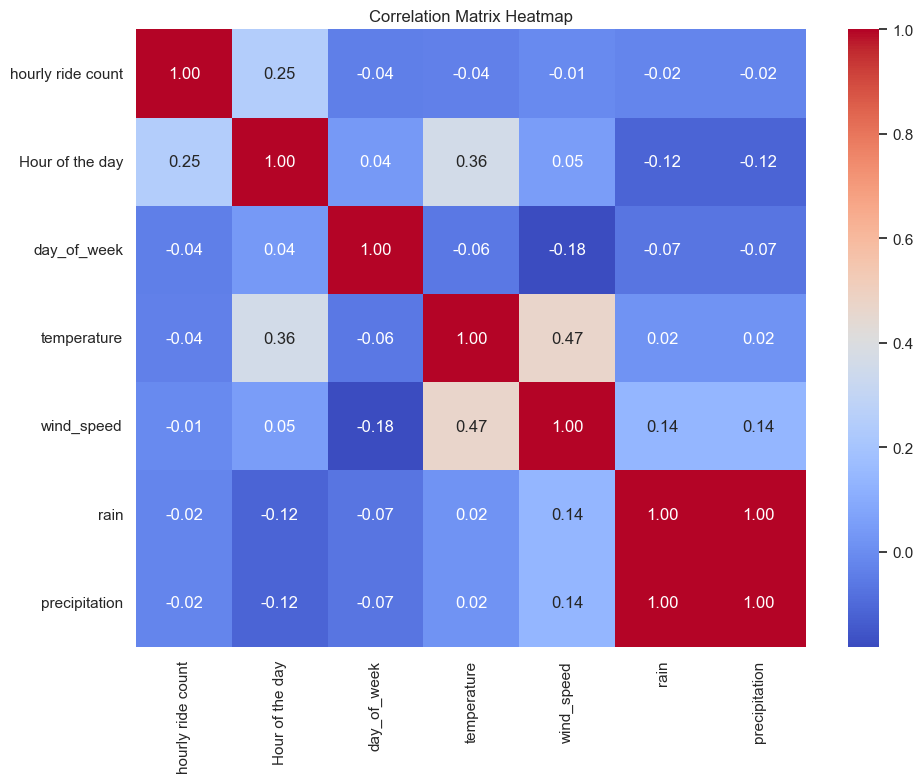

In [ ]:
# Correlation Matrix and Heatmap for hourly ride count
plt.figure(figsize=(10, 8))
selected_columns = ['hourly ride count', 'Hour of the day', 'day_of_week', 'temperature', 'wind_speed', 'rain', 'precipitation']
correlation_matrix = trips_full[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap for hourly ride count')
plt.tight_layout()
plt.savefig('Fig1_correlation_matrix_heatmap_hourly_ride_count.png')
plt.show()

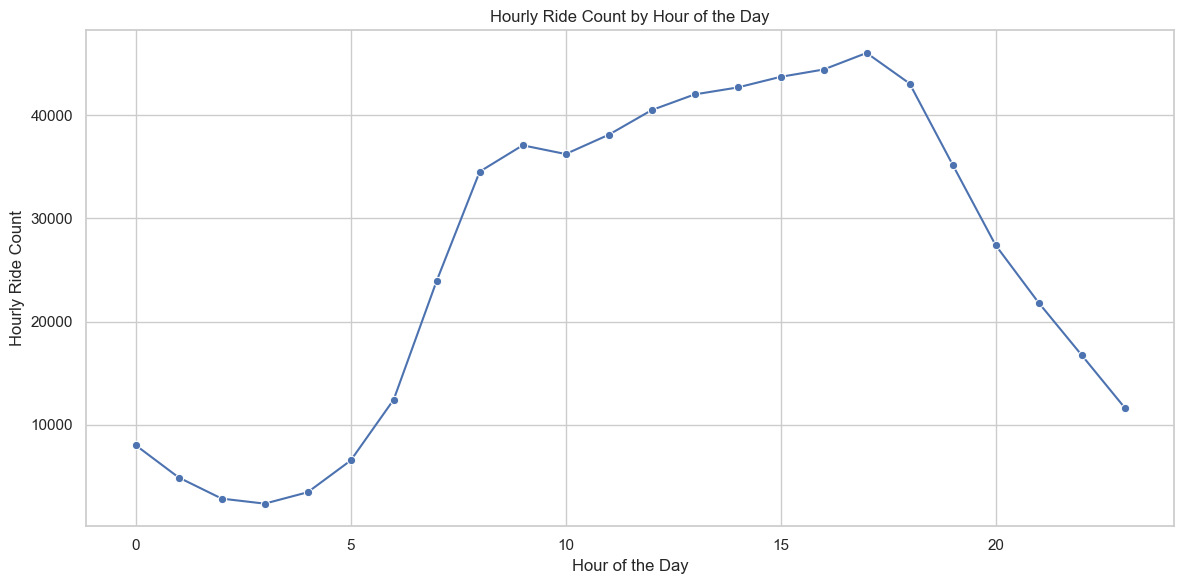

In [100]:
# Hourly Ride Count by Hour of the Day
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_ride_count, x='Hour of the day', y='hourly ride count', marker='o')
plt.title('Hourly Ride Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Hourly Ride Count')
plt.tight_layout()
plt.savefig('Fig2_hourly_ride_count_by_hour.png')
plt.show()

C:\Users\rhamo\AppData\Local\Temp\ipykernel_17808\1439084318.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('cool', len(pivot_count_rides_hour_weekday.columns)) #coolwarm goes from blue (cold) to red (warm)


<Figure size 1000x600 with 0 Axes>

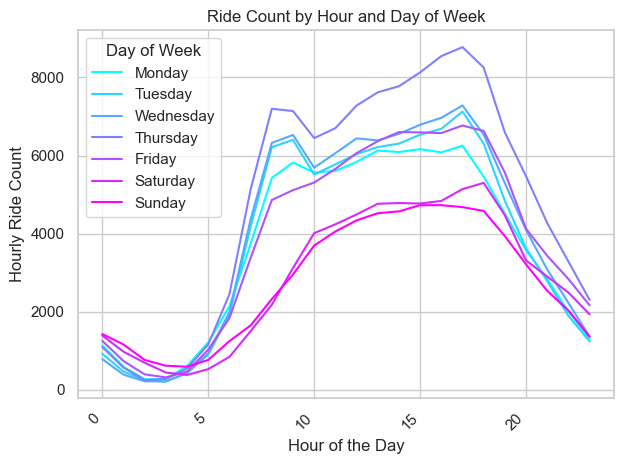

In [101]:
# Create a pivot table with day of week names as column labels
pivot_count_rides_hour_weekday = pd.pivot_table(
    trips_full, values=['hourly ride count'], index=['Hour of the day'],
    columns=['day_of_week'], aggfunc='count', fill_value=0
)
pivot_count_rides_hour_weekday.columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Choose a colormap
cmap = cm.get_cmap('cool', len(pivot_count_rides_hour_weekday.columns)) #coolwarm goes from blue (cold) to red (warm)
colors = [cmap(i) for i in range(len(pivot_count_rides_hour_weekday.columns))]

# Create the line chart
plt.figure(figsize=(10, 6))
pivot_count_rides_hour_weekday.plot.line(color=colors)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Hour of the Day')
plt.ylabel('Hourly Ride Count')
plt.title('Ride Count by Hour and Day of Week')

# Improve legend clarity
plt.legend(title='Day of Week')

plt.grid(True)
plt.tight_layout()
plt.savefig('Fig3_ride_count_by_hour_and_day_of_week.png')
plt.show()

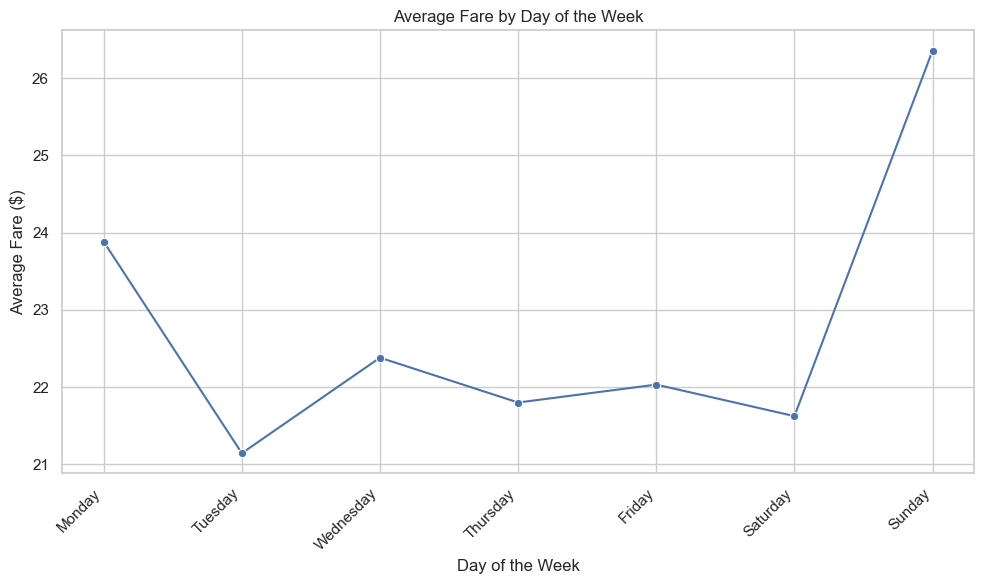

In [102]:
# Calculate average fare by day of the week
day_fare_avg = trips_full.groupby('day_of_week')['fare'].mean().reset_index()

# Map day of week numbers to day names
day_names = {1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday", 7: "Sunday"}

# Using a dictionary for mapping
day_fare_avg['day_name'] = day_fare_avg['day_of_week'].map(day_names)
x = 'day_name'  # Use the new 'day_name' column for the x-axis

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=day_fare_avg, x=x, y='fare', marker='o')

# Customize the plot
plt.title('Average Fare by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Fig4_average_fare_by_day.png')
plt.show()

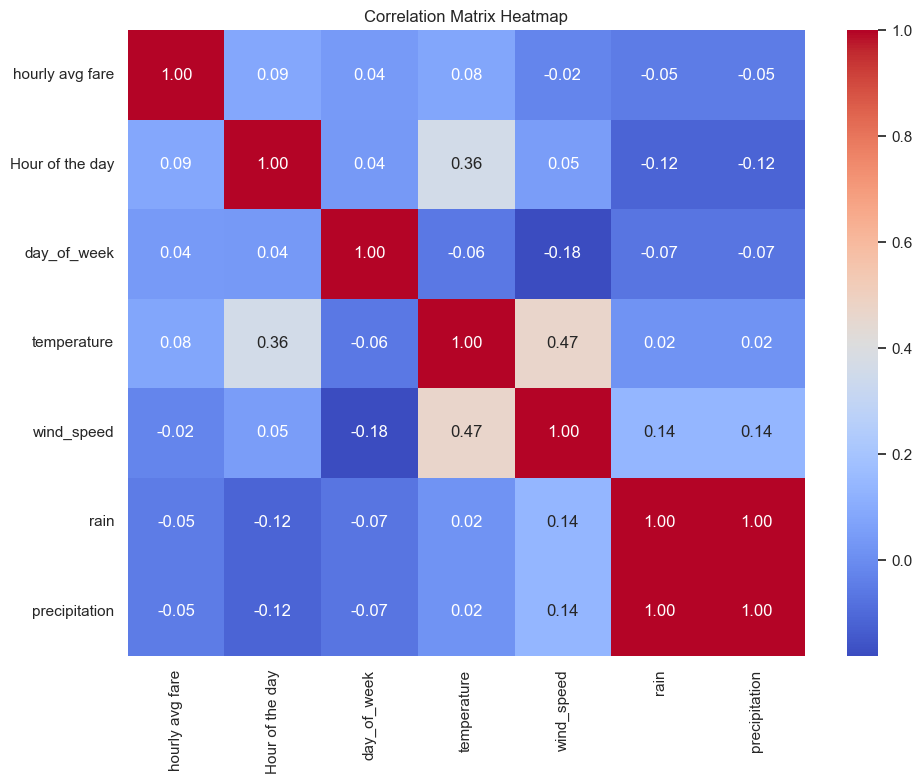

In [ ]:
# Correlation Matrix and Heatmap for hourly avg fare
plt.figure(figsize=(10, 8))
selected_columns = ['hourly avg fare','Hour of the day', 'day_of_week', 'temperature', 'wind_speed', 'rain', 'precipitation']
correlation_matrix = trips_full[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap for hourly average fare')
plt.tight_layout()
plt.savefig('Fig5_correlation_matrix_heatmap_hourly_avg_fare.png')
plt.show()

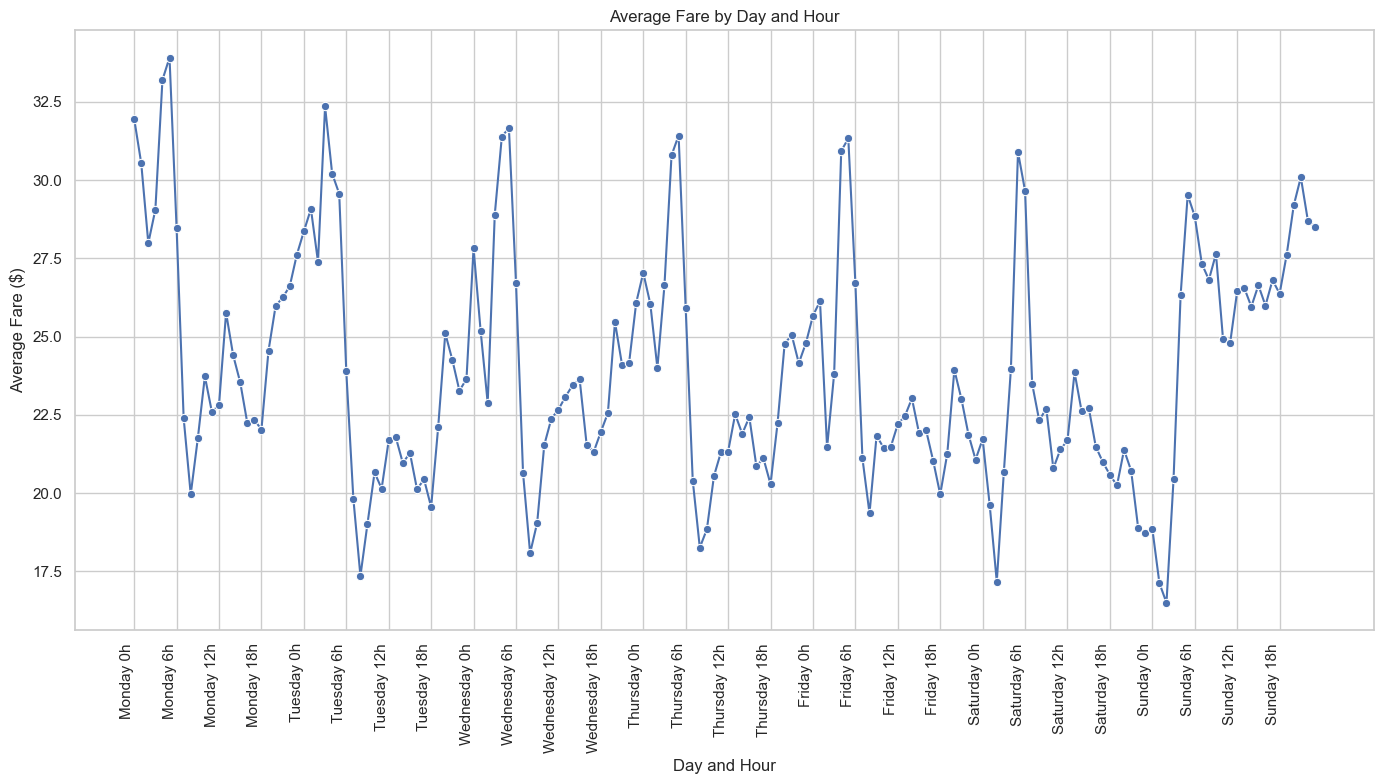

In [104]:
# Average Fare by Day and Hour (Chronological Order)
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_fare_by_day_hour, x='day_hour', y='fare', marker='o')
plt.title('Average Fare by Day and Hour')
plt.xlabel('Day and Hour')
plt.ylabel('Average Fare ($)')
plt.xticks(ticks=range(0, len(avg_fare_by_day_hour), 6), labels=avg_fare_by_day_hour['day_hour'][::6], rotation=90, ha='right')
plt.tight_layout()
plt.savefig('Fig6_average_fare_by_day_hour.png')
plt.show()

C:\Users\rhamo\AppData\Local\Temp\ipykernel_17808\2113201776.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('cool', len(pivot_avg_fare_hour_weekday.columns)) #coolwarm goes from blue (cold) to red (warm)


<Figure size 1000x600 with 0 Axes>

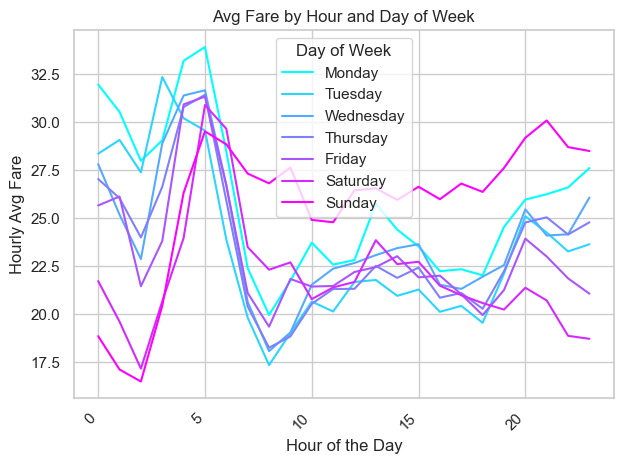

In [105]:
# Create a pivot table with day of week names as column labels
pivot_avg_fare_hour_weekday = pd.pivot_table(
    trips_full, values=['fare'], index=['Hour of the day'],
    columns=['day_of_week'], aggfunc='mean', fill_value=0
)
pivot_avg_fare_hour_weekday.columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Choose a colormap
cmap = cm.get_cmap('cool', len(pivot_avg_fare_hour_weekday.columns)) #coolwarm goes from blue (cold) to red (warm)
colors = [cmap(i) for i in range(len(pivot_avg_fare_hour_weekday.columns))]

# Create the line chart
plt.figure(figsize=(10, 6))
pivot_avg_fare_hour_weekday.plot.line(color=colors)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Hour of the Day')
plt.ylabel('Hourly Avg Fare')
plt.title('Avg Fare by Hour and Day of Week')

# Improve legend clarity
plt.legend(title='Day of Week')

plt.grid(True)
plt.tight_layout()
plt.savefig('Fig7_avg_fare_by_hour_and_day_of_week.png')
plt.show()